<a href="https://colab.research.google.com/github/harbidel/Lung-Cancer-Model-Deploy-to-Production/blob/main/Lung_Cancer_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LUNG CANCER PREDICTION MODEL**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('/content/survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
new_header = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
              'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING',
              'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']

data.columns = new_header
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# **EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS_OF_BREATH    309 non-null    int64 
 13  SWALLOWING_DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

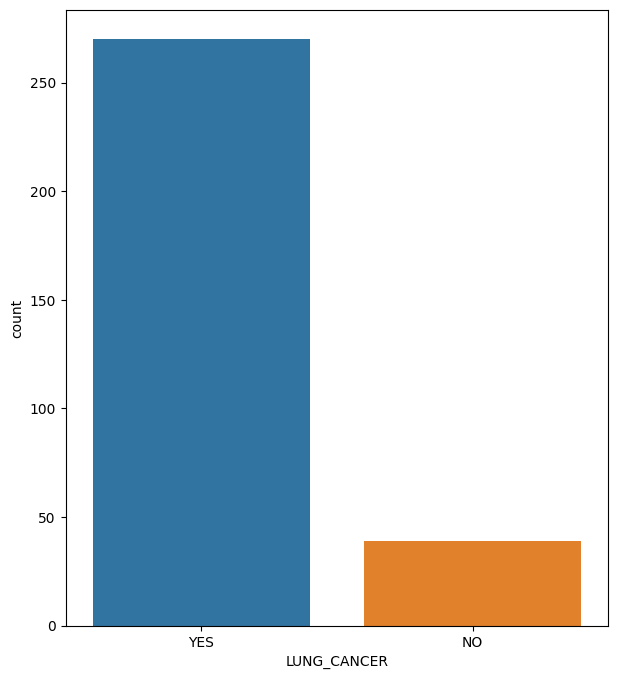

In [ ]:
# plotting graph for output classes counts

plt.figure(figsize=(7,8))
sns.countplot(x = 'LUNG_CANCER',data = data)

<Axes: xlabel='GENDER', ylabel='count'>

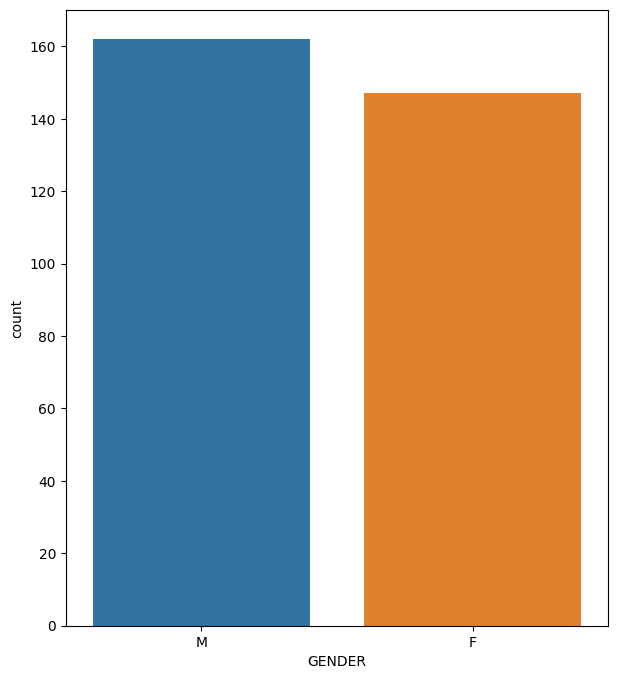

In [ ]:
# plotting graph for output classes counts

plt.figure(figsize=(7,8))
sns.countplot(x = 'GENDER',data = data)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['GENDER']= lb.fit_transform(data['GENDER'])
data['LUNG_CANCER']= lb.fit_transform(data['LUNG_CANCER'])

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


array([[<Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>],
       [<Axes: title={'center': 'ANXIETY'}>,
        <Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC_DISEASE'}>,
        <Axes: title={'center': 'FATIGUE'}>],
       [<Axes: title={'center': 'ALLERGY'}>,
        <Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL_CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>],
       [<Axes: title={'center': 'SHORTNESS_OF_BREATH'}>,
        <Axes: title={'center': 'SWALLOWING_DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST_PAIN'}>,
        <Axes: title={'center': 'LUNG_CANCER'}>]], dtype=object)

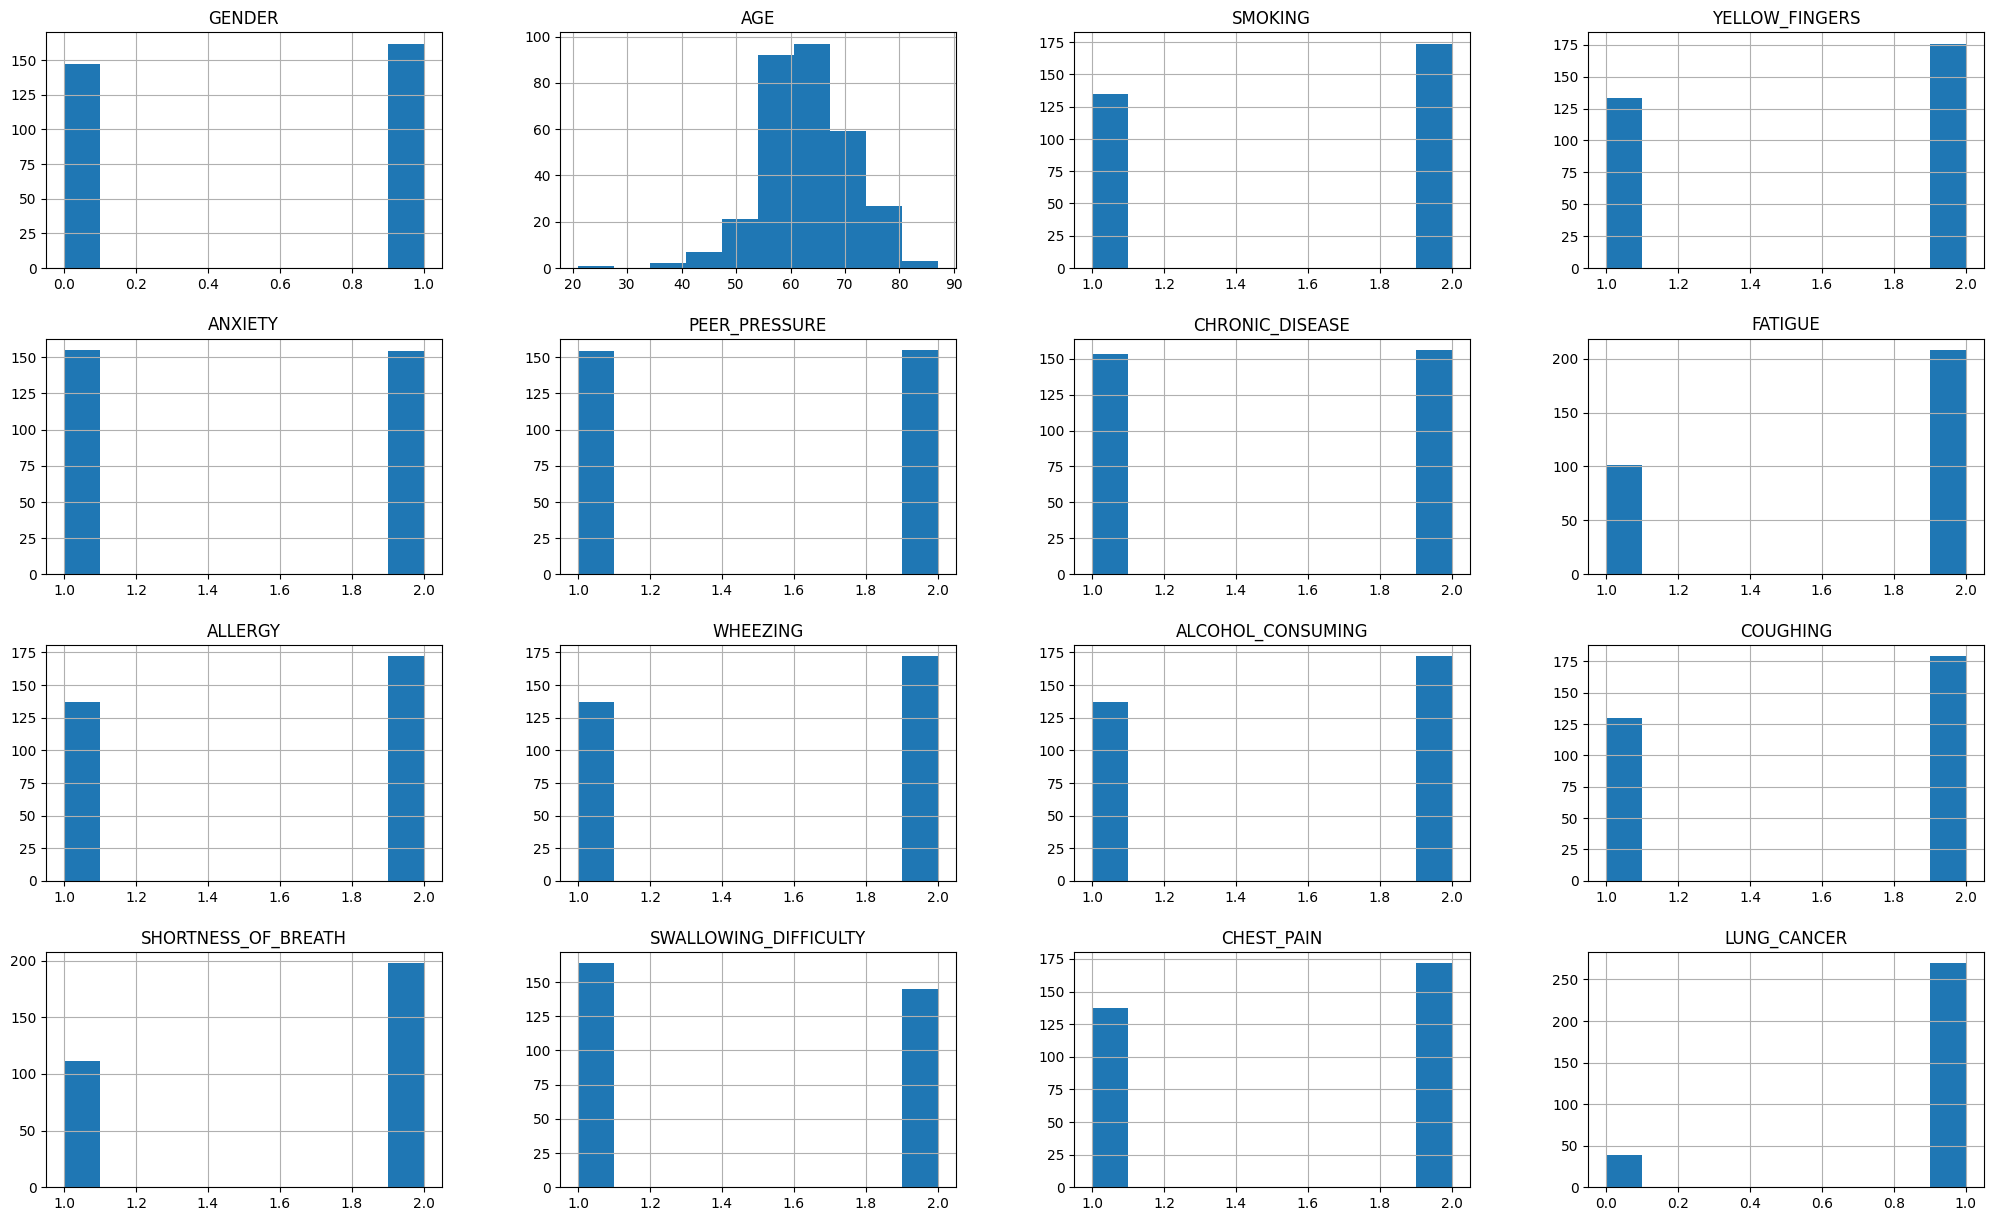

In [ ]:
# plotting variation graphs for each property

data.hist(figsize = (25,15))

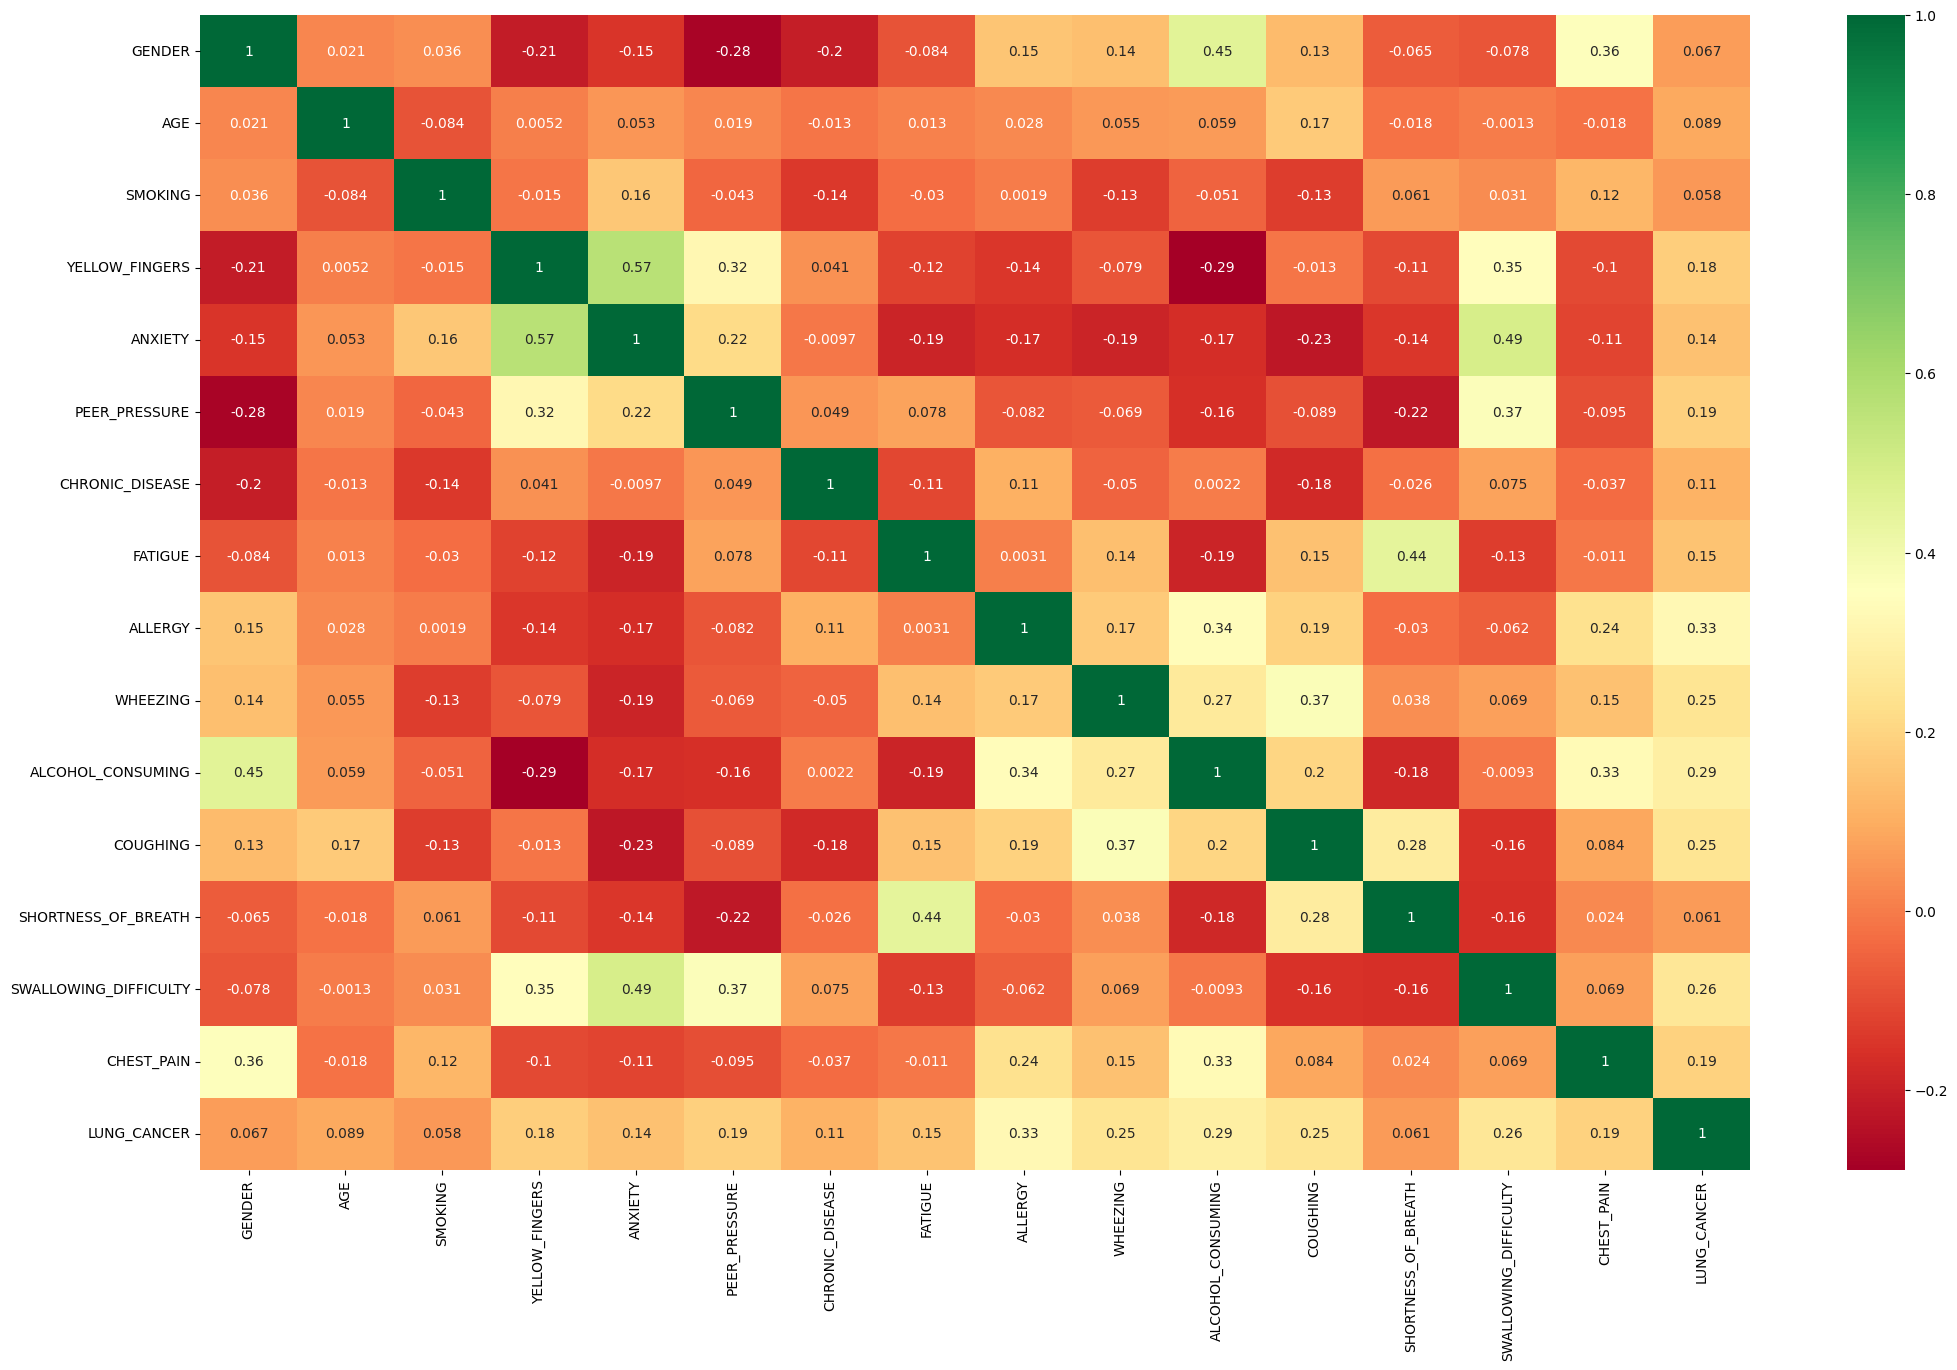

In [ ]:
# Plotting the correlation heatmap
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,15))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
126,1,51,2,1,1,1,1,2,1,2,2,2,2,1,2
109,1,53,1,1,1,1,2,2,2,1,2,1,2,1,2
247,1,67,1,2,1,1,1,2,1,2,2,2,2,1,1
234,1,77,1,2,1,2,1,2,2,2,2,2,1,1,1
202,1,74,2,1,1,1,2,2,2,2,2,1,1,2,2


In [ ]:
X_test.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
288,0,61,1,2,2,2,1,1,2,2,1,2,1,2,1
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2
57,1,73,1,1,1,1,2,1,2,1,2,2,2,2,2
60,1,70,1,2,1,2,2,2,2,2,2,2,1,2,2
25,1,65,1,2,2,1,1,2,1,2,2,2,2,2,2


# MACHINE LEARNING MODEL

# RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(X_train, y_train)

In [ ]:
# Prediction
y_pred = model.predict(X_test)

In [ ]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



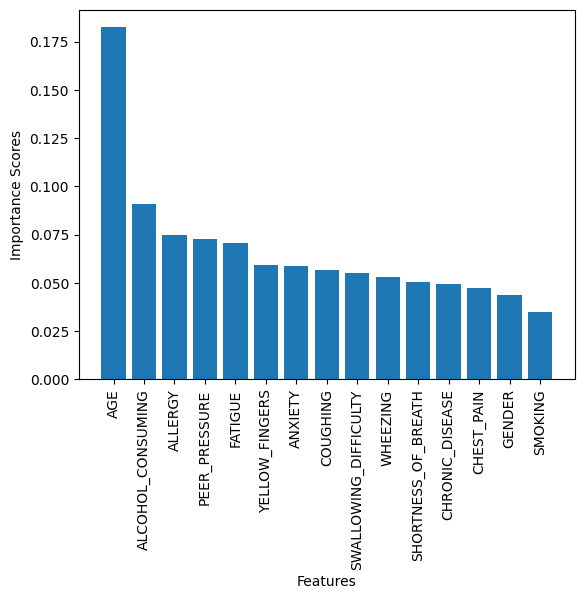

In [ ]:
# Get feature importances from the trained random forest classifier
importance_scores = model.feature_importances_

# Sort the feature importances and corresponding feature names in descending order
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_features = X_train.columns[sorted_indices]  # Assuming you have named columns in your dataset

# Visualize the feature importances
plt.bar(range(len(sorted_scores)), sorted_scores)
plt.xticks(range(len(sorted_scores)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.show()


In [ ]:
import pickle

pickle_file = open('model.pkl', 'ab')
pickle.dump(model, pickle_file)
pickle_file.close()

In [ ]:
data = pd.read_csv("/content/survey lung cancer.csv")

label_encoder = LabelEncoder()

categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
for feature in categorical_features:
    print(feature, list(data[feature].unique()), list(label_encoder.fit_transform(data[feature].unique())), "\n")

GENDER ['M', 'F'] [1, 0] 

LUNG_CANCER ['YES', 'NO'] [1, 0] 



In [ ]:
gender_map = {"F": 0, "M": 1}
lung_cancer_map = {0: "NO", 1: "YES"}

def predict_lung_cancer(GENDER,
                        AGE,
                        SMOKING,
                        YELLOW_FINGERS,
                        ANXIETY,
                        PEER_PRESSURE,
                        CHRONIC_DISEASE,
                        FATIGUE,
                        ALLERGY,
                        WHEEZING,
                        ALCOHOL_CONSUMING,
                        COUGHING,
                        SHORTNESS_OF_BREATH,
                        SWALLOWING_DIFFICULTY,
                        CHEST_PAIN):
    # 1. Read the machine learning model from its saved state ...
    pickle_file = open('model.pkl', 'rb')
    model = pickle.load(pickle_file)

    # 2. Transform the "raw data" passed into the function to the encoded / numerical values using the maps / dictionaries
    GENDER = gender_map[GENDER]

    # 3. Make an individual prediction for this set of data
    y_predict = model.predict([[GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE,
                                CHRONIC_DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL_CONSUMING,
                                COUGHING, SHORTNESS_OF_BREATH, SWALLOWING_DIFFICULTY, CHEST_PAIN]])[0]

    # 4. Return the "raw" version of the prediction i.e. the actual name of the drug rather than the numerical encoded version
    return lung_cancer_map[y_predict]


In [ ]:
predict_lung_cancer("M", 69, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'YES'

In [ ]:
predict_lung_cancer("F", 50, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'NO'